In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [20]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(device=dev)
def my_circuit(theta):
    qml.PauliX(wires=0)
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(wires=0))

In [21]:
expectations_pauliZ = []
thetas = np.arange(-np.pi, np.pi, 0.01)

for theta in thetas:
    e = my_circuit(theta=theta)
    expectations_pauliZ.append(e)

In [22]:
expectations_pauliZ

[tensor(1., requires_grad=True),
 tensor(0.99995, requires_grad=True),
 tensor(0.99980001, requires_grad=True),
 tensor(0.99955003, requires_grad=True),
 tensor(0.99920011, requires_grad=True),
 tensor(0.99875026, requires_grad=True),
 tensor(0.99820054, requires_grad=True),
 tensor(0.997551, requires_grad=True),
 tensor(0.99680171, requires_grad=True),
 tensor(0.99595273, requires_grad=True),
 tensor(0.99500417, requires_grad=True),
 tensor(0.9939561, requires_grad=True),
 tensor(0.99280864, requires_grad=True),
 tensor(0.99156189, requires_grad=True),
 tensor(0.990216, requires_grad=True),
 tensor(0.98877108, requires_grad=True),
 tensor(0.98722728, requires_grad=True),
 tensor(0.98558477, requires_grad=True),
 tensor(0.98384369, requires_grad=True),
 tensor(0.98200424, requires_grad=True),
 tensor(0.98006658, requires_grad=True),
 tensor(0.97803091, requires_grad=True),
 tensor(0.97589745, requires_grad=True),
 tensor(0.9736664, requires_grad=True),
 tensor(0.97133797, requires_grad

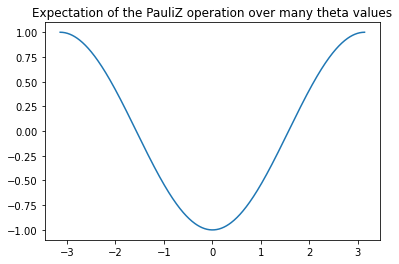

In [23]:
plt.plot(thetas, expectations_pauliZ)
plt.title('Expectation of the PauliZ operation over many theta values')
plt.show()

In [24]:
len(thetas)

629

In [25]:
len(expectations_pauliZ)

629

In [26]:
my_circuit(0.1)

tensor(-0.99500417, requires_grad=True)

In [27]:
theta_initial = np.array([-1.6], requires_grad=True)

In [28]:
theta_initial

tensor([-1.6], requires_grad=True)

In [29]:
optimizer = qml.GradientDescentOptimizer(stepsize=0.1)

In [30]:
n_iters = 100

for it in range(n_iters):
    theta_new, prev_cost = optimizer.step_and_cost(my_circuit, theta_initial)
    theta_initial = theta_new
    if it%10==0:
        print(f"Iteration: {it+1}\t Theta: {theta_new}\t Cost: {my_circuit(theta_new)}")

Iteration: 1	 Theta: [-1.50004264]	 Cost: -0.07069466872057056
Iteration: 11	 Theta: [-0.64522977]	 Cost: -0.7989616114021642
Iteration: 21	 Theta: [-0.23327271]	 Cost: -0.9729150777790415
Iteration: 31	 Theta: [-0.08171777]	 Cost: -0.9966629608289557
Iteration: 41	 Theta: [-0.02850952]	 Cost: -0.9995936310761658
Iteration: 51	 Theta: [-0.00994135]	 Cost: -0.9999505852090432
Iteration: 61	 Theta: [-0.00346636]	 Cost: -0.9999939921698952
Iteration: 71	 Theta: [-0.00120865]	 Cost: -0.9999992695859691
Iteration: 81	 Theta: [-0.00042143]	 Cost: -0.9999999111986738
Iteration: 91	 Theta: [-0.00014694]	 Cost: -0.9999999892038313
